## DB

In [ ]:
import sqlite3

def get_table_names(file_path):
    
    # Create a SQL connection to our SQLite database
    con = sqlite3.connect(file_path)

    # creating cursor
    cur = con.cursor()

    # reading all table names
    table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table' OR type = 'view'")]

    # Be sure to close the connection
    con.close()

    table_names = [name[0] for name in table_list]

    return table_names


def print_data(file_path, table_name = None):
    
    if table_name is None:
        table_names = get_table_names(file_path)

        # Create a SQL connection to our SQLite database
        con = sqlite3.connect(file_path)

        cur = con.cursor()

        # The result of a "cursor.execute" can be iterated over by row
        for name in table_names:
            if name == 'ElementaryGeometries' or name == 'SpatialIndex':
                continue
            sql_command = "SELECT * FROM " + name
            print(name)
            for row in cur.execute(sql_command):
                print(row)
            print('\n\n')

        # Be sure to close the connection
        con.close()
    
    else:
        # Create a SQL connection to our SQLite database
        con = sqlite3.connect(file_path)

        cur = con.cursor()

        # The result of a "cursor.execute" can be iterated over by row
        sql_command = "SELECT * FROM " + table_name
        print(table_name)
        for row in cur.execute(sql_command):
            print(row)

        # Be sure to close the connection
        con.close()

In [ ]:
a = get_table_names(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db")
len(a)
print(a)

In [ ]:
import sqlite3

def initialize(file_path):
    
    # Create a SQL connection to our SQLite database
    # returns connection and cursor

    con = sqlite3.connect(file_path)
    cur = con.cursor()
    print('Opening connection')

    return cur, con


def finilize(con):

    # Closes SQL connection

    con.close()
    print('Closing connection')

In [ ]:
def work(file_path, sql):
    
    cur, con = initialize(file_path)
    out = cur.execute(sql)
    print('SQL done')
    
    table_list = [a[0] for a in out] #why do I get ordered output sometimes???
    print('Work completed')

    finilize(con)

    return table_list

In [ ]:
sql = "SELECT DISTINCT Area FROM RoomElements LIMIT 10"
table_list = work(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db", sql)

print(table_list)

In [ ]:
import sqlite3

def generate_docs(db, docs, title):
    # open doc file and define table template
    f = open(docs, "w+")
    f.write(title + "\n")
    table_template = "|{}|{}|\n| :-: | :-:|\n".format("COLUMN", "DESCRIPTION")
    # open database
    con = sqlite3.connect(db)
    cur = con.cursor()
    cur.execute("SELECT name FROM sqlite_master WHERE type='view';")
    for table in cur.fetchall():
        # print table name
        table_name = table[0].upper()
        f.write("### {}\n".format(table_name))
        f.write(table_template)
        if table_name == 'ELEMENTARYGEOMETRIES' or table_name == 'SPATIALINDEX':
            continue
        # print table columns
        cur.execute("SELECT * FROM {};".format(table_name))
        cols = [description[0] for description in cur.description]
        for col in cols:
            f.write("| {} | |\n".format(col))
    f.close()


generate_docs(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db", "db_template_views.md",
              "Room schema")

In [ ]:
# issue with SpatialIndex and ElementaryGeometries
print_data(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db", 'SpatialIndex')

In [156]:
import pymysql
  
def mysqlconnect(sql_command):
    # To connect MySQL database
    conn = pymysql.connect(
        host='192.168.2.140',
        user='admin', 
        password = "admin",
        db='db',
        port=6606
        )
      
    cur = conn.cursor()
    cur.execute(sql_command)
    output = cur.fetchall()
    print('Printing table:\n\n', output)
      
    # To close the connection
    conn.close()

    return output

In [158]:
df = mysqlconnect("SELECT table_name FROM information_schema.tables")

Printing table:

 (('CHARACTER_SETS',), ('COLLATIONS',), ('COLLATION_CHARACTER_SET_APPLICABILITY',), ('COLUMNS',), ('COLUMN_PRIVILEGES',), ('ENGINES',), ('EVENTS',), ('FILES',), ('GLOBAL_STATUS',), ('GLOBAL_VARIABLES',), ('KEY_COLUMN_USAGE',), ('OPTIMIZER_TRACE',), ('PARAMETERS',), ('PARTITIONS',), ('PLUGINS',), ('PROCESSLIST',), ('PROFILING',), ('REFERENTIAL_CONSTRAINTS',), ('ROUTINES',), ('SCHEMATA',), ('SCHEMA_PRIVILEGES',), ('SESSION_STATUS',), ('SESSION_VARIABLES',), ('STATISTICS',), ('TABLES',), ('TABLESPACES',), ('TABLE_CONSTRAINTS',), ('TABLE_PRIVILEGES',), ('TRIGGERS',), ('USER_PRIVILEGES',), ('VIEWS',), ('INNODB_LOCKS',), ('INNODB_TRX',), ('INNODB_SYS_DATAFILES',), ('INNODB_FT_CONFIG',), ('INNODB_SYS_VIRTUAL',), ('INNODB_CMP',), ('INNODB_FT_BEING_DELETED',), ('INNODB_CMP_RESET',), ('INNODB_CMP_PER_INDEX',), ('INNODB_CMPMEM_RESET',), ('INNODB_FT_DELETED',), ('INNODB_BUFFER_PAGE_LRU',), ('INNODB_LOCK_WAITS',), ('INNODB_TEMP_TABLE_INFO',), ('INNODB_SYS_INDEXES',), ('INNODB_SYS_T

In [1]:
#import os
import pymysql
import pandas as pd

""" host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')
 """

conn = pymysql.connect(
    host='192.168.2.140',
    user='admin', 
    password = "admin",
    db='db',
    port=6606
    )

#usage:
#df = pd.read_sql_query("SELECT * FROM folders", conn)

In [ ]:
pd.read_sql_query("SELECT table_name FROM information_schema.tables", conn)

In [47]:
# inside 01_ARC there are all the rooms, no need for everything else

# select items that are in the 01_arc folder
# select versions of the found item_id
# select objects with found versions
# select what you need from such objects

df = pd.read_sql_query("SELECT DISTINCT name FROM properties WHERE object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC')))) \
    ORDER BY name", conn)
df.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\properties.csv', index = False)

## ROOMS

In [2]:
revit_rooms = pd.read_sql_query("SELECT DISTINCT object_id FROM properties WHERE value = 'Revit Rooms' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC'))))", conn)

In [3]:
revit_rooms

,object_id
0,002bfde8b293cfa120fea76015dc098f9065b5cf
1,004ba9ab790e3be3ba47da199ea4b1a7830d70a2
2,007af3e783ad71a1b2604f117c0b4c85ebac435b
3,0090a29533f90f65310a9b571949206d28249824
4,00ac87faba28fc51f82ef20c779870f4e81d0956
...,...
10571,ff43f5d0bd1fc5c2ed2ef9ee82a4d714696fca97
10572,ffb81cb733a9558059b3b9ac322f71bf16bb7c98
10573,ffb9c1a61ffedeec2d4ddcab4d1c6e4ba0f42017
10574,ffbe266f4f17c9936e0c7ee602a685be7241ae8c


In [113]:
revit_rooms_names = pd.read_sql_query("SELECT DISTINCT value FROM properties WHERE BINARY name = 'Name' AND object_id IN \
    (SELECT DISTINCT object_id FROM properties WHERE value = 'Revit Rooms' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC'))))) ORDER BY value", conn)

In [116]:
revit_rooms_names.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\revit_rooms_names.csv', index = False)

In [96]:
first_room = pd.read_sql_query("SELECT name, value FROM properties WHERE object_id = '002bfde8b293cfa120fea76015dc098f9065b5cf' ORDER BY name", conn)

In [98]:
first_room.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\first_room.csv', index = False)

In [117]:
# select id of all kontor (office)
offices_kontor = pd.read_sql_query("SELECT DISTINCT object_id FROM properties WHERE value = 'Kontor' AND BINARY name = 'Name' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC'))))", conn)

In [118]:
offices_kontor

,object_id
0,85c5eb89dedc0c1dab1ca019eb3115f304a926d4
1,0d89e46ac066e527a96ad24b1ba56f1a08a4bfa6
2,4ce94f070ee01ae83cfeaa60da9a09af527032e8
3,57ff8940e7052bcfea83cf82143220426641f0f3
4,849ad2ad699255ae21a7d984b77ec491d1cae69b
5,6255fb3336d0fd546c0d5838529c3fd9c02bc081


In [120]:
first_kontor = pd.read_sql_query("SELECT name, value FROM properties WHERE object_id = '85c5eb89dedc0c1dab1ca019eb3115f304a926d4' ORDER BY name", conn)

In [121]:
first_kontor.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\first_kontor.csv', index = False)

In [ ]:
# get all revit rooms on every plan (level) with their count

In [157]:
floor1_count = pd.read_sql_query("SELECT value, COUNT(*) FROM properties WHERE BINARY name = 'Name' AND object_id IN \
    (SELECT DISTINCT object_id FROM properties WHERE value = 'Plan 1 (01)' AND object_id IN \
    (SELECT DISTINCT object_id FROM properties WHERE value = 'Revit Rooms' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC')))))) \
    GROUP BY value", conn)

In [174]:
floor1_count.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\floor1_count.csv', index = False)

In [161]:
sum(floor1_count['COUNT(*)'])

1247

In [173]:
floor1_count = floor1_count.sort_values(by='COUNT(*)', ascending=False)

In [162]:
floor2_count = pd.read_sql_query("SELECT value, COUNT(*) FROM properties WHERE BINARY name = 'Name' AND object_id IN \
    (SELECT DISTINCT object_id FROM properties WHERE value = 'Plan 2 (02)' AND object_id IN \
    (SELECT DISTINCT object_id FROM properties WHERE value = 'Revit Rooms' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC')))))) \
    GROUP BY value", conn)

In [164]:
sum(floor2_count['COUNT(*)'])

1600

In [165]:
floor2_count.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\floor2_count.csv', index = False)

In [166]:
floor3_count = pd.read_sql_query("SELECT value, COUNT(*) FROM properties WHERE BINARY name = 'Name' AND object_id IN \
    (SELECT DISTINCT object_id FROM properties WHERE value = 'Plan 3 (03)' AND object_id IN \
    (SELECT DISTINCT object_id FROM properties WHERE value = 'Revit Rooms' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC')))))) \
    GROUP BY value", conn)

In [167]:
floor4_count = pd.read_sql_query("SELECT value, COUNT(*) FROM properties WHERE BINARY name = 'Name' AND object_id IN \
    (SELECT DISTINCT object_id FROM properties WHERE value = 'Plan 4 (04)' AND object_id IN \
    (SELECT DISTINCT object_id FROM properties WHERE value = 'Revit Rooms' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC')))))) \
    GROUP BY value", conn)

In [168]:
floor3_count.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\floor3_count.csv', index = False)
floor4_count.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\floor4_count.csv', index = False)

In [169]:
print(sum(floor3_count['COUNT(*)']))
print(sum(floor4_count['COUNT(*)']))

2467
1023


## USEFUL PROPERTIES

In [122]:
levels = pd.read_sql_query("SELECT DISTINCT value FROM properties WHERE name = 'Level' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC')))) \
    ORDER BY value", conn)

In [123]:
levels.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\levels.csv', index = False)

In [89]:
categories = pd.read_sql_query("SELECT DISTINCT value FROM properties WHERE name = 'Category' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC'))))", conn)

In [99]:
categories.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\categories.csv', index = False)

In [186]:
WBS_L_4_Level = pd.read_sql_query("SELECT DISTINCT value FROM properties WHERE name = 'WBS_L.4-Level' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC'))))", conn)

In [189]:
WBS_L_4_Level.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\WBS_L_4_Level.csv', index = False)

In [195]:
WBS_L_2_Site = pd.read_sql_query("SELECT DISTINCT value FROM properties WHERE name = 'WBS_L.2-Site' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC'))))", conn)

In [196]:
WBS_L_2_Site.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\WBS_L_2_Site.csv', index = False)

In [197]:
WBS_L_3_Building = pd.read_sql_query("SELECT DISTINCT value FROM properties WHERE name = 'WBS_L.3-Building' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC'))))", conn)

In [198]:
WBS_L_3_Building.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\WBS_L_3_Building.csv', index = False)

In [44]:
buildings = pd.read_json(r'C:\Users\Administrator\Desktop\ATI_project\database files\WBS_L_3_Building.csv')
levels = pd.read_json(r'C:\Users\Administrator\Desktop\ATI_project\database files\WBS_L_4_Level.csv')

In [ ]:
# GOAL: get all rooms with meaningful attributes in every building/floor

# attributes: Level, Name, Perimeter, WBS_L.2-Site, WBS_L.3-Building, WBS_L.4-Level

# file: name is building and floor (Level, WBS_L.3-Building, WBS_L.4-Level) -> is site necessary?
# not gonna use Level as there is another attribute with the same name

# inside file: 1st col is room id (object_id), 2nd col is room type (Name), 3rd col is Perimeter (useful to check if it corresponds to the one obtained from coordinates)
# inside file then gonna add coordinates of room corners and doors

In [6]:
fast_query = "SELECT object_id, name, value FROM properties WHERE (BINARY name = 'Name' OR name IN ('WBS_L.3-Building','WBS_L.4-Level')) AND object_id IN \
    (SELECT DISTINCT object_id FROM properties WHERE value = 'Revit Rooms' AND object_id IN \
    (SELECT id FROM objects WHERE version_id IN \
    (SELECT id FROM versions WHERE item_id IN \
    (SELECT id FROM items WHERE folder_id IN \
    (SELECT id from folders WHERE name = '01_ARC')))))"

In [7]:
data = pd.read_sql_query(fast_query, conn)

In [11]:
data.to_json(r'C:\Users\Administrator\Desktop\ATI_project\database files\data_json.csv')
data = pd.read_json(r'C:\Users\Administrator\Desktop\ATI_project\database files\data_json.csv')

In [46]:
buildings = buildings.drop(index=3)
buildings

,value
0,B22
1,B24
10,B52
11,B10
12,B12
13,B94
14,B96
15,B98
16,B45
17,B02


In [48]:
levels = levels.drop(index=5)
levels

,value
0,L01
1,L03
10,FN1
11,LEA
12,LRA
2,L04
3,LRO
4,L00
6,L02
7,FN0


In [65]:
keys = []
for building in buildings['value']:
    for level in levels['value']:
        tmp = building + "_" + level
        keys.append(tmp)

my_dict = {}
for key in keys:
    my_dict[key] = []

In [68]:
wrong_rooms = []
i = 0
for room in revit_rooms['object_id']:
    # count number of rows with that room id
    count = len(data.loc[data['object_id'] == room])
    if count != 3:
        wrong_rooms.append(room)
        i += count
        continue
    key = data['value'][i] + "_" + data['value'][i+1]
    tmp = [data['object_id'][i], data['value'][i+2]]
    my_dict[key].append(tmp)
    i += 3

In [70]:
len(wrong_rooms)

77

In [119]:
wrong_types = {}
for wrong_room in wrong_rooms:
    tmp = data.loc[data['object_id'] == wrong_room]
    tmp = tmp.loc[tmp['name'] == 'Name'].iat[0,2]
    wrong_types[tmp] = 'present'

In [120]:
wrong_types

{'Skakt EL': 'present',
 'Forberedelse': 'present',
 'Forberedt for rørpost': 'present',
 'Teknikrum': 'present',
 'Rørpost': 'present',
 'Taskeskab': 'present',
 'Ren zone, Elevator': 'present',
 'Room': 'present',
 'Teknikrum vand': 'present',
 'Forrum': 'present',
 'Laboratorium': 'present',
 'Skakt VVS/Ventilation': 'present',
 'Korridor': 'present',
 'Fryserum': 'present',
 'AGV rum': 'present'}

In [81]:
query = "SELECT name, value FROM properties WHERE object_id = '" + wrong_rooms[0] + "' ORDER BY name"
wrong_room = pd.read_sql_query(query, conn)

In [82]:
wrong_room.to_csv(r'C:\Users\Administrator\Desktop\ATI_project\database files\wrong_room.csv', index = False)

In [ ]:
conn.close()

## GAN

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(111)

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [ ]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

In [ ]:
generated_samples

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms


torch.manual_seed(111)


device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)


train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)


batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)


real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

discriminator = Discriminator().to(device=device)


class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In [ ]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

## Creating json

<ol>
  <li>Input is an image from RPLAN dataset</li>
  <li>Read image and get room type and coordinates of walls, last entry is just index of room, poly is number of walls for each room/door; in walls just need to add -1 in position 4, -1 in position 7 and 0 in position 8</li>
  <li>From DB I can get all info given by read_data, i.e. room type and walls/doors from coordinates</li>
  <li>Then transform such output to json with raster_to_join function</li>
</ol>

In [61]:
line = r'C:\Users\Administrator\Desktop\Example data\0.png'

In [2]:
from matplotlib import pyplot as plt

def floor_plan(walls):

    fig = plt.figure()
    
    for line in walls:
        plt.plot([line[0], line[2]], [-line[1], -line[3]], color='black')

    plt.ylim([-256, 0])
    plt.xlim([0, 256])

    fig.set_size_inches(12, 12)

In [121]:
import numpy as np
from data_reader.read_dd import read_data

rms_type,poly,doors,walls,out = read_data(line)
rms_type,poly,doors,walls,out

([3, 4, 1, 3, 2, 5, 17, 17, 17, 17, 17, 15],
 [4, 4, 12, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 [[108.0, 145.0, 108.0, 155.0],
  [108.0, 155.0, 110.0, 155.0],
  [110.0, 155.0, 110.0, 145.0],
  [110.0, 145.0, 108.0, 145.0],
  [114.0, 158.0, 114.0, 160.0],
  [114.0, 160.0, 125.0, 160.0],
  [125.0, 160.0, 125.0, 158.0],
  [125.0, 158.0, 114.0, 158.0],
  [114.0, 127.0, 114.0, 129.0],
  [114.0, 129.0, 124.0, 129.0],
  [124.0, 129.0, 124.0, 127.0],
  [124.0, 127.0, 114.0, 127.0],
  [145.0, 60.0, 145.0, 84.0],
  [145.0, 84.0, 147.0, 84.0],
  [147.0, 84.0, 147.0, 60.0],
  [147.0, 60.0, 145.0, 60.0],
  [134.0, 204.0, 134.0, 206.0],
  [134.0, 206.0, 178.0, 206.0],
  [178.0, 206.0, 178.0, 204.0],
  [178.0, 204.0, 134.0, 204.0],
  [165.0, 38.0, 165.0, 52.0],
  [165.0, 52.0, 167.0, 52.0],
  [167.0, 52.0, 167.0, 38.0],
  [167.0, 38.0, 165.0, 38.0]],
 [[72.0, 161.0, 72.0, 220.0, -1, 3, 0, -1, 0],
  [72.0, 220.0, 124.0, 220.0, -1, 3, 0, -1, 0],
  [124.0, 220.0, 124.0, 161.0, -1, 3, 0, -1, 0],
  [124.0, 161.0, 7

In [153]:
coords = []
for row in walls:
    coords.append(row[0:2])

In [150]:
def my_read_data(coords, rms_type):
    '''
    fetch relevant data of a floor plan from database and distribute it to
    rms_type, poly, doors, walls
    '''

    '''
    get_coords = "SELECT * FROM"
    coords = mysqlconnect(get_coords) # am I getting all corners of a room and then all of the next one?
    get_rooms = "SELECT * FROM"
    rms_type = mysqlconnect(get_rooms) # are rooms type ordered according to rooms coords?
    '''

    poly = [] # if coords are x and y, just count how many xy couples you have to get n. of walls
              # do I know it already from database?
    doors = [] # do I have them as well? Like walls need coordinates, if you at least know what rooms they connect you can add them yourself
    walls = []

    idx = 0 # room number
    _poly = 0 # counting n. of walls
    for i in range(len(coords)-1):
        # how is SQL data structured? If I have coords of corners of rooms I just need to put them together
        if (coords[i][0] != coords[i+1][0] and coords[i][1] != coords[i+1][1]):
            _poly += 1
            poly.append(_poly)
            walls.append([coords[i][0], coords[i][1], coords[i-_poly+1][0], coords[i-_poly+1][1], -1, rms_type[idx], idx, -1, 0]) # include last wall of room idx
            _poly = 0 # restart walls count
            idx += 1 # next room
            continue
        _poly += 1
        walls.append([coords[i][0], coords[i][1], coords[i+1][0], coords[i+1][1], -1, rms_type[idx], idx, -1, 0])
        
    # count and add last wall
    _poly += 1
    poly.append(_poly)
    i += 1
    walls.append([coords[i][0], coords[i][1], coords[i-_poly+1][0], coords[i-_poly+1][1], -1, rms_type[idx], idx, -1, 0]) # append very last wall
    # same as above for doors
    #doors
    
    return rms_type,poly,doors,walls

In [151]:
rms_type1,poly1,doors1,walls1 = my_read_data(coords,rms_type)

In [3]:
#removed original plot, added custom and changed name of output file, removed parse_args

from shapely.geometry import Polygon
import json
import numpy as np
from data_reader.read_dd import read_data

def raster_to_json(line):
    """ convert extracted data from rasters to housegan ++ data format :  extract rooms type, bbox, doors, edges and neigbour rooms
                
    """
    #fig = plt.figure()
    #ax = fig.add_subplot(1, 1, 1)
    bbox_x1=[]
    bbox_y1=[]
    bbox_x2=[]
    bbox_y2=[]
    walls=[]

    room_type,poly,doors_, walls,out=read_data(line)
    d=[]
    all_doors=[]
    for i in range(1,len(doors_)+1):
        if((i)%4==0 ) & (i+1!=1):
            d.append(doors_[i-1])
            all_doors.append(d)
            d=[]
        elif(i==1):
            d=[]
        if(i%4!=0):
            d.append(doors_[i-1])
    kh=0
    al_dr=0
    for hd in range(len(all_doors)):
        dr_t=[]
        dr_in=[]
        doors=all_doors[hd]
        d_t=2
        t_x=abs(doors[0][1]-doors[1][1])
        t_y=abs(doors[0][0]-doors[3][0])
        ss=t_x
        if(t_x>t_y):
           d_t=1
           ss=t_y
        elif(t_x<t_y):
           d_t=3
        for pmc in range(5):
            for dw in range(len(doors)):      
                for nw in range(len(walls)) :
                    if(walls[nw][5]==17):
                        continue
                    if(walls[nw][5]==15):
                        continue
                    if (d_t<=2) &(doors[dw][0]-doors[dw][2]<=1)& (walls[nw][0]-walls[nw][2]<=1)& (abs(doors[dw][0]-walls[nw][0])<=(ss-1)) & (abs(doors[dw][2]-walls[nw][2])<=(ss-1)): 
                        l=doors[dw][1]
                        r=doors[dw][3]
                        if(l>r):
                            t=l
                            l=r
                            r=t
                        l_=walls[nw][1]
                        r_=walls[nw][3]
                        if(l_>r_):
                            t=l_
                            l_=r_
                            r_=t
                        if (((r-r_)<=pmc )& (pmc>=(l_-l))) :
                            if(len(dr_in)<2):
                                if(walls[nw][6] not in dr_t):
                                    dr_t.append(walls[nw][6])
                                    dr_in.append(nw)
                               
                    elif (d_t>=2)& (doors[dw][1]-doors[dw][3]<=1)& (walls[nw][1]-walls[nw][3]<=1) &(abs(doors[dw][1]-walls[nw][1])<=(ss-1)) & (abs(doors[dw][3]-walls[nw][3])<=(ss-1)): 
                        l=doors[dw][0]
                        r=doors[dw][2]
                        if(l>r):
                            t=l
                            l=r
                            r=t
                        l_=walls[nw][0]
                        r_=walls[nw][2]
                        if(l_>r_):
                            t=l_
                            l_=r_
                            r_=t
                        if(((r-r_)<=pmc )& (pmc>=(l_-l))):
                            if(len(dr_in)<2):
                                if(walls[nw][6] not in dr_t):
                                    dr_t.append(walls[nw][6])
                                    dr_in.append(nw)
        if(len(dr_t)==2):
            walls[dr_in[0]][8]=walls[dr_in[1]][5]
            walls[dr_in[0]][7]=walls[dr_in[1]][6]    
            walls[dr_in[1]][8]=walls[dr_in[0]][5]
            walls[dr_in[1]][7]=walls[dr_in[0]][6]  
            al_dr=al_dr+1
                
        else:
            print("sometime not 2 dooor",hd,doors)		
    
        assert(len(dr_t)<=2)
  

    assert(al_dr==(len(all_doors)-1))
    
    
    omn=[]
    tr=0
    en_pp=0
    for nw in range(len(walls)-(len(all_doors)*4),len(walls)):
        if(tr%4==0):
            omn=[]
        tr=tr+1
        for kw in range(len(walls)-(len(all_doors)*4)+1):
            if(walls[kw][5]==17)&(walls[nw][5]==17):
                continue		
            if(walls[kw][5]==15)&(walls[nw][5]==15):
                continue		
            if(walls[kw][5]==15)&(walls[nw][5]==17):
                continue		
            for pmc in range (5):
                if(abs(walls[kw][0]-walls[nw][0])<=(ss-1)) & (abs(walls[kw][2]-walls[nw][2])<=(ss-1)):
                    l=walls[kw][1]
                    r=walls[kw][3]
                    if(l>r):
                        t=l
                        l=r
                        r=t
                    l_=walls[nw][1]
                    r_=walls[nw][3]
                    if(l_>r_):
                        t=l_
                        l_=r_
                        r_=t
                    if(pmc>=r_-r )& (l-l_<=pmc) &( nw!=kw):
                        if(walls[nw][5]==17) &(walls[nw][8]==0)& (walls[kw][6] not in omn):
                            walls[nw][8]=walls[kw][5]
                            walls[nw][7]=walls[kw][6]    
                            omn.append(walls[kw][6])
                        if(walls[nw][5]==15) &(walls[nw][8]==0):
                            walls[nw][8]=walls[kw][5]
                            walls[nw][7]=walls[kw][6] 
                            en_pp=1 
                 
                if(abs(walls[kw][1]-walls[nw][1])<=(ss-1)) & (abs(walls[kw][3]-walls[nw][3])<=(ss-1)):
                    l=walls[kw][0]
                    r=walls[kw][2]
                    if(l>r):
                        t=l
                        l=r
                        r=t
                    l_=walls[nw][0]
                    r_=walls[nw][2]
                    if(l_>r_):
                        t=l_
                        l_=r_
                        r_=t
                    if(pmc>=r_-r )& (l-l_<=pmc) &( nw!=kw):
                        if(walls[nw][5]==17) & (walls[nw][8]==0)& (walls[kw][6] not in omn):
                            walls[nw][8]=walls[kw][5]
                            walls[nw][7]=walls[kw][6]    
                            omn.append(walls[kw][6])
                
                        if(walls[nw][5]==15) & (walls[nw][8]==0):
                            walls[nw][8]=walls[kw][5]
                            walls[nw][7]=walls[kw][6]    
                            en_pp=1
         
                    
    for i in range(1):
        for iw in range(len(walls)):
            tp_out=-1
            dif_x=10
            dif_y=10

            type_out=0
        for jw in range(len(walls)):
            if(walls[iw][0]==walls[iw][2]):
                if (walls[jw][0]!=walls[jw][2]):
                    continue
                if ((walls[iw][0]-walls[jw][0])==(walls[iw][2]- walls[jw][2])):
                    rnp=walls[jw][1]
                    fnp=walls[jw][3]
                    rmp=walls[iw][1]
                    fmp=walls[iw][3]
                    if( rnp<fnp):
                        t=fnp
                        fnp=rnp
                        rnp=t
                    if(rmp<fmp):
                        t=fmp
                        fmp=rmp
                        rmp=t
                    if(abs(rmp)<=abs(rnp))| (abs(fmp)<=abs(fnp)):
                        dif_x_temp=walls[iw][0]-walls[jw][0]
                        if(abs(dif_x)>abs(dif_x_temp)) & (iw!=jw):
                            dif_x=dif_x_temp
                            tp_out=walls[jw][6]
                            type_out=walls[jw][5]
                          
            elif(walls[iw][1]==walls[iw][3]):
                if ((walls[iw][1]-walls[jw][1])==(walls[iw][3]- walls[jw][3])) :           
                    rnp=walls[jw][0]
                    fnp=walls[jw][2]
                    rmp=walls[iw][0]
                    fmp=walls[iw][2]
                    if( rnp<fnp):
                        t=fnp
                        fnp=rnp
                        rnp=t
                    if(rmp<fmp):
                        t=fmp
                        fmp=rmp
                        rmp=t
                    if(abs(rmp)<=abs(rnp))| (abs(fmp)<=abs(fnp)):
                        dif_y_temp=walls[iw][1]-walls[jw][1]
                        if(abs(dif_y)>abs(dif_y_temp))&( iw!=jw ):
                            dif_y=dif_y_temp
                            tp_out=walls[jw][6]
                            type_out=walls[jw][5]
      
    km=0
    assert(en_pp==1) #throwing out really strange layouts
    
    
    lenx=1.0
    leny=1.0
    min_x=0.0
    min_y=0.0
    bboxes=[]  
    edges=[]
    ed_rm=[]
    info=dict()

    #  The edges for the graph
    for w_i in range(len(walls)):
        edges.append([((walls[w_i][0]-min_x)/lenx),((walls[w_i][1]-min_y)/leny),((walls[w_i][2]-min_x)/lenx),((walls[w_i][3]-min_y)/leny),walls[w_i][5],walls[w_i][8]])
        if(walls[w_i][6]==-1):
            ed_rm.append([walls[w_i][7]])
        elif(walls[w_i][7]==-1): 
            ed_rm.append([walls[w_i][6]])
        else:
            ed_rm.append([walls[w_i][6],walls[w_i][7]])
    
    #  The bbox for room masks
    for i in range(len(poly)):
        p=poly[i]
        pm=[]
        for p_i in range((p)):
            pm.append(([edges[km+p_i][0],edges[km+p_i][1]]))
        km=km+p
        polygon = Polygon(pm)
        #plot_coords(ax, polygon.exterior, alpha=0)
        bbox=np.asarray(polygon.bounds)
        bboxes.append(bbox.tolist())
     
        
        #patch = PolygonPatch(polygon, facecolor=semantics_cmap["bedroom"], alpha=0.7)
        #ax.add_patch(patch)
    
    floor_plan(walls)
   
    info['room_type'] = room_type
    info['boxes'] = bboxes
    info['edges'] = edges
    info['ed_rm'] = ed_rm

    print('\n\n', bboxes, '\n\n', edges, '\n\n', ed_rm)
   
  
    ### saving json files
    with open(line[:-4]+".json","w") as f:
         json.dump(info, f)
    
    return bboxes, edges, ed_rm

sometime not 2 dooor 5 [[165.0, 38.0, 165.0, 52.0], [165.0, 52.0, 167.0, 52.0], [167.0, 52.0, 167.0, 38.0], [167.0, 38.0, 165.0, 38.0]]


 [[72.0, 161.0, 124.0, 220.0], [72.0, 130.0, 107.0, 157.0], [111.0, 28.0, 184.0, 203.0], [72.0, 87.0, 124.0, 126.0], [115.0, 53.0, 144.0, 83.0], [128.0, 207.0, 184.0, 228.0], [108.0, 145.0, 110.0, 155.0], [114.0, 158.0, 125.0, 160.0], [114.0, 127.0, 124.0, 129.0], [145.0, 60.0, 147.0, 84.0], [134.0, 204.0, 178.0, 206.0], [165.0, 38.0, 167.0, 52.0]] 

 [[72.0, 161.0, 72.0, 220.0, 3, 0], [72.0, 220.0, 124.0, 220.0, 3, 0], [124.0, 220.0, 124.0, 161.0, 3, 0], [124.0, 161.0, 72.0, 161.0, 3, 1], [72.0, 130.0, 72.0, 157.0, 4, 0], [72.0, 157.0, 107.0, 157.0, 4, 0], [107.0, 157.0, 107.0, 130.0, 4, 1], [107.0, 130.0, 72.0, 130.0, 4, 0], [148.0, 28.0, 148.0, 87.0, 1, 2], [148.0, 87.0, 128.0, 87.0, 1, 0], [128.0, 87.0, 128.0, 130.0, 1, 0], [128.0, 130.0, 111.0, 130.0, 1, 3], [111.0, 130.0, 111.0, 157.0, 1, 4], [111.0, 157.0, 128.0, 157.0, 1, 3], [128.0, 157.0, 1

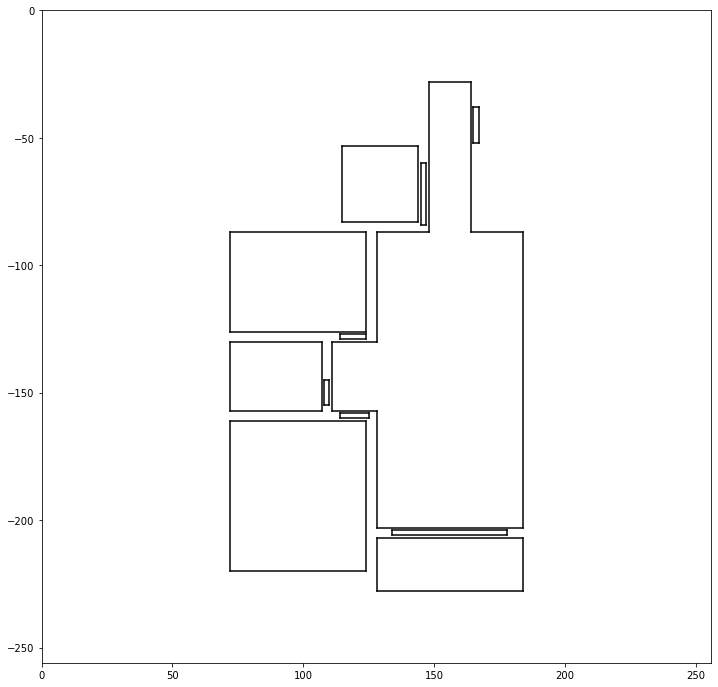

In [4]:
bboxes, edges, ed_rm = raster_to_json(line)

In [ ]:
# info about output structure at https://github.com/sepidsh/Housegan-data-reader

## Model

<ol>
  <li>Input for training is json file constructed above</li>
  <li>then</li>
  <li>then</li>
  <li>then</li>
</ol>